In [56]:
#import packages 
import numpy as np
import pandas as pd
from tensorflow import keras 


In [221]:
#import data 
path = 'data/'
data_1 = pd.read_csv(path + '20180821 - sitting_chewing.csv').values
data_2 = pd.read_csv(path + '20180905 - walking.csv').values
data_3 = pd.read_csv(path + '20180917 - 0003 - jglad - sitting.csv').values
data_4 = pd.read_csv(path + '20180917 - 0001 - jglad - walking_chewing.csv').values

In [222]:
data_4 = data_4.astype('int64')

In [226]:
np.argmax(data_4,axis=0)

array([20360, 21446, 24784, 21081], dtype=int64)

In [208]:
#get velocity 
vel_1 = np.diff(data_1,axis=0)
vel_2 = np.diff(data_2,axis=0)
vel_3 = np.diff(data_3,axis=0)
vel_4 = np.diff(data_4,axis=0)

In [200]:
data_1 = np.hstack([data_1[:len(data_1)-1,:],vel_1])
data_2 = np.hstack([data_2[:len(data_2)-1,],vel_2])
data_3 = np.hstack([data_3[:len(data_3)-1,],vel_3])
data_4 = np.hstack([data_4[:len(data_4)-1,],vel_4])

In [104]:
data_1 = np.hstack([data_1, np.zeros(len(data_1)).reshape(len(data_1),1)])
data_2 = np.hstack([data_2, np.ones(len(data_2)).reshape(len(data_2),1)])
data_3 = np.hstack([data_3, 2*np.ones(len(data_3)).reshape(len(data_3),1)])
data_4 = np.hstack([data_4, 3*np.ones(len(data_4)).reshape(len(data_4),1)])

In [105]:
data = np.vstack([data_1, data_2, data_3, data_4])
X = data[:,:data.shape[1] - 1]
Y = data[:,data.shape[1] - 1]

In [106]:
data_4

array([[-8.640e+02, -4.128e+03,  5.600e+02, ..., -1.280e+02, -3.480e+02,
         3.000e+00],
       [-7.520e+02, -3.808e+03,  4.320e+02, ..., -4.800e+01,  3.400e+01,
         3.000e+00],
       [-1.056e+03, -3.776e+03,  3.840e+02, ...,  2.400e+02,  9.000e+00,
         3.000e+00],
       ...,
       [-1.984e+03, -3.808e+03,  7.680e+02, ..., -3.520e+02, -1.260e+02,
         3.000e+00],
       [-1.968e+03, -3.728e+03,  4.160e+02, ..., -3.200e+01, -8.000e+01,
         3.000e+00],
       [-2.176e+03, -3.520e+03,  3.840e+02, ...,  1.280e+02,  6.100e+01,
         3.000e+00]])

In [107]:
#standard scaling
import sklearn.preprocessing as pre
X_scaled =  pre.scale(X)

c:\program files\python\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [108]:
#split into training and test set
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X_scaled,Y,test_size=0.2,random_state=0)

In [109]:
#do one-hot encoding
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder

enc = OneHotEncoder(sparse=False)

In [110]:
integer_encoded_train = trainY.reshape(len(trainY), 1)
onehot_encoded_train = enc.fit_transform(integer_encoded_train)

integer_encoded_test = testY.reshape(len(testY), 1)
onehot_encoded_test = enc.fit_transform(integer_encoded_test)

In [111]:
onehot_encoded_train

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])

In [112]:
#set up neural network
model = keras.Sequential()


In [113]:
model.add(keras.layers.Dense(
  units = trainX.shape[1] - 1,
  input_dim = trainX.shape[1],
  activation = 'tanh'
))

model.add(keras.layers.Dense(
  units = onehot_encoded_train.shape[1],
  input_dim = trainX.shape[1],
    activation = 'softmax'    
))


In [114]:
model.compile(loss = 'mean_squared_error',
             optimizer = 'Adam',
             metrics = ['categorical_accuracy'])

In [116]:
history = model.fit(trainX, onehot_encoded_train,
                   batch_size = 100, epochs = 100,
                   verbose = 1,
                   validation_split = 0.1)

Train on 279615 samples, validate on 31069 samples
Epoch 1/100
279615/279615 [==============================] - 3s 11us/step - loss: 0.1286 - categorical_accuracy: 0.6211 - val_loss: 0.1029 - val_categorical_accuracy: 0.7040
Epoch 2/100
279615/279615 [==============================] - 3s 9us/step - loss: 0.0935 - categorical_accuracy: 0.7365 - val_loss: 0.0864 - val_categorical_accuracy: 0.7573
Epoch 3/100
279615/279615 [==============================] - 3s 11us/step - loss: 0.0845 - categorical_accuracy: 0.7659 - val_loss: 0.0816 - val_categorical_accuracy: 0.7774
Epoch 4/100
279615/279615 [==============================] - 4s 14us/step - loss: 0.0815 - categorical_accuracy: 0.7763 - val_loss: 0.0799 - val_categorical_accuracy: 0.7793
Epoch 5/100
279615/279615 [==============================] - 3s 12us/step - loss: 0.0803 - categorical_accuracy: 0.7766 - val_loss: 0.0793 - val_categorical_accuracy: 0.7807
Epoch 6/100
279615/279615 [==============================] - 3s 10us/step - loss

279615/279615 [==============================] - 3s 10us/step - loss: 0.0769 - categorical_accuracy: 0.7808 - val_loss: 0.0762 - val_categorical_accuracy: 0.7824
Epoch 48/100
279615/279615 [==============================] - 3s 10us/step - loss: 0.0769 - categorical_accuracy: 0.7812 - val_loss: 0.0763 - val_categorical_accuracy: 0.7875
Epoch 49/100
279615/279615 [==============================] - 3s 10us/step - loss: 0.0769 - categorical_accuracy: 0.7811 - val_loss: 0.0762 - val_categorical_accuracy: 0.7856
Epoch 50/100
279615/279615 [==============================] - 3s 9us/step - loss: 0.0769 - categorical_accuracy: 0.7811 - val_loss: 0.0762 - val_categorical_accuracy: 0.7853
Epoch 51/100
279615/279615 [==============================] - 3s 11us/step - loss: 0.0769 - categorical_accuracy: 0.7811 - val_loss: 0.0762 - val_categorical_accuracy: 0.7820
Epoch 52/100
279615/279615 [==============================] - 3s 10us/step - loss: 0.0769 - categorical_accuracy: 0.7810 - val_loss: 0.0761

Epoch 94/100
279615/279615 [==============================] - 3s 10us/step - loss: 0.0766 - categorical_accuracy: 0.7807 - val_loss: 0.0759 - val_categorical_accuracy: 0.7833
Epoch 95/100
279615/279615 [==============================] - 3s 11us/step - loss: 0.0766 - categorical_accuracy: 0.7810 - val_loss: 0.0760 - val_categorical_accuracy: 0.7827
Epoch 96/100
279615/279615 [==============================] - 3s 10us/step - loss: 0.0766 - categorical_accuracy: 0.7810 - val_loss: 0.0760 - val_categorical_accuracy: 0.7845
Epoch 97/100
279615/279615 [==============================] - 3s 10us/step - loss: 0.0766 - categorical_accuracy: 0.7810 - val_loss: 0.0759 - val_categorical_accuracy: 0.7825
Epoch 98/100
279615/279615 [==============================] - 3s 10us/step - loss: 0.0766 - categorical_accuracy: 0.7813 - val_loss: 0.0759 - val_categorical_accuracy: 0.7825
Epoch 99/100
279615/279615 [==============================] - 3s 10us/step - loss: 0.0766 - categorical_accuracy: 0.7809 - va

In [117]:
model.evaluate(testX,onehot_encoded_test)

77671/77671 [==============================] - 1s 11us/step


[0.07677593994521409, 0.7803298528423634]

In [118]:
X

array([[  752., -3920., -1424., ...,   112.,  -192.,    24.],
       [ 1024., -3808., -1616., ...,  -304.,   -32.,   300.],
       [ 1088., -4112., -1648., ...,   -48.,    48.,   -42.],
       ...,
       [-1984., -3808.,   768., ...,    80.,  -352.,  -126.],
       [-1968., -3728.,   416., ...,   208.,   -32.,   -80.],
       [-2176., -3520.,   384., ...,  -112.,   128.,    61.]])

In [119]:
#plotting the curves 
import matplotlib.pyplot as plt


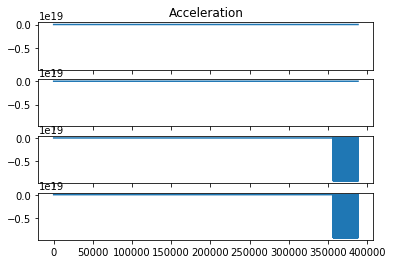

In [120]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4,sharex = True, sharey = True)
ax1.plot(data[:,0])
ax1.set_title('Acceleration')
ax2.plot(data[:,1])
ax3.plot(data[:,2])
ax4.plot(data[:,3])
f.savefig('Acceleration.png',dpi = 150)

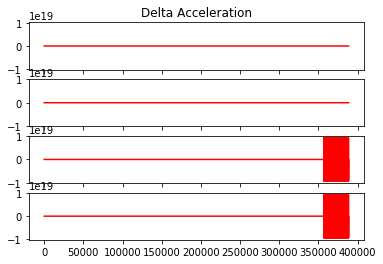

In [95]:
f, (ax4, ax5, ax6, ax7) = plt.subplots(4,sharex = True, sharey = True)

ax4.plot(data[:,4],color = 'r')
ax4.set_title('Delta Acceleration')
ax5.plot(data[:,5],color = 'r')
ax6.plot(data[:,6],color = 'r')
ax7.plot(data[:,7],color = 'r')
f.savefig('Delta_Acceleration.png', dpi =150)

In [96]:
vel_1

array([[ 272,  112, -192,   24],
       [  64, -304,  -32,  300],
       [-336,  -48,   48,  -42],
       ...,
       [  16,  -16,  304,  -85],
       [  48,  -16, -304,  123],
       [ -16,  208,  320, -304]], dtype=int64)

In [97]:
vel_1.max()

960

In [98]:
# saving the model 
# save model and weights
str = 'SittingChewing_Walking'
model_json = model.to_json()
with open(str + '.json', "w") as json_file:
    json_file.write(model_json)
    
model.save_weights(str + '.h5')
